https://learn.qiskit.org/v1/course/ch-algorithms/defining-quantum-circuits

In [1]:
#initialization
import matplotlib.pyplot as plt
import numpy as np
import math

# importing Qiskit
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.visualization import plot_histogram

# importing Qiskit
from qiskit.quantum_info import SparsePauliOp
from qiskit.opflow import I, X, Y, Z, H, CX, Zero, ListOp, PauliExpectation, PauliTrotterEvolution, CircuitSampler, MatrixEvolution, Suzuki, PauliSumOp
from qiskit.circuit import Parameter


In [2]:
# import numpy as np
# import scipy.linalg as la
# des = [7/8, 3/8]
# n = len(des)
# s = np.diag(des)
# q, _ = la.qr(np.random.rand(n, n))
# A = q.T @ s @ q
# eigs_h, vecs_h = np.linalg.eig(A)
# # print(vecs)
# # print(eigs)
# # print('hermitian eigenvalues', eigs_h)
# U = la.expm(1j*A)
# eigs_u, vecs_u = np.linalg.eig(U)
# # print('unitary eigenvalues', eigs_u)
# # print(eigs_u)
# # print(f"{eigs_h[0]} - {eigs_u[0]} = {eigs_h[0] - eigs_u[0]}")
# # print(la.expm(1j*2*np.pi*des[0]))
# print(la.expm(1j*np.pi*des[0]), eigs_u[0])
# # print(vecs_u)
# # print('check:\n', vecs_u[0]*eigs_u[0], '\n', np.dot(U.T, vecs_u[0]))
# # vecs_u[0]*eigs_u[0] == U*vecs_u[0]

In [3]:
# from scipy.stats import unitary_group
# U = unitary_group.rvs(4)
# eigs_u, vecs_u = np.linalg.eig(U)
# print(U)
# print(eigs_u)

In [4]:
# # need to initialize 2 vectors
# U = unitary_group.rvs(2)
# eigs_u, vecs_u = np.linalg.eig(U)
# print(U)
# print(eigs_u)

In [5]:
from scipy.stats import unitary_group
dimension = 2
# U = unitary_group.rvs(dimension)
# np.save('array.txt', U)
U = np.load('array.txt.npy')
# import sys
# np.set_printoptions(threshold=sys.maxsize)
eigs_u, vecs_u = np.linalg.eig(U)

In [17]:
n_for_vector = np.log2(dimension)
n_of_qubs = 10


eigs = QuantumRegister(n_of_qubs, 'eigenvalues')
vector = QuantumRegister(n_for_vector, 'eigenvector')
cr = ClassicalRegister(n_of_qubs, 'c')
qpe = QuantumCircuit(eigs, vector, cr)


# qpe = QuantumCircuit(n_of_qubs+1, n_of_qubs)
qpe.initialize(vecs_u[0], vector)
# qpe.draw()

In [18]:
for qubit in range(n_of_qubs):
    qpe.h(qubit)
# qpe.draw()

In [19]:
# def get_gate(A, n):    
#     pauli_op = PauliSumOp(SparsePauliOp.from_operator(A))
#     phi = Parameter('ϕ')
#     evolution_op = (phi * pauli_op).exp_i() # exp(-iϕA)
#     # print(evolution_op)
#     trotterized_op = PauliTrotterEvolution(trotter_mode=Suzuki(order=2, reps=1)).convert(evolution_op).bind_parameters({phi: np.pi/n})
#     #----control---------
#     gate = trotterized_op.to_circuit()
#     gate.name = f"e^(i*A*pi/{n})"
#     gate.label = f"e^(i*A*np.pi/{n})"
#     gate = gate.to_gate().control()
#     #---------------------
#     return gate

In [20]:
# repetitions = 1
# for counting_qubit in range(3):
#     for i in range(repetitions):
#         qpe.cp(math.pi/4, counting_qubit, 3); # This is CU
#     repetitions *= 2
# qpe.draw()
from qiskit.quantum_info.operators import Operator
from qiskit.extensions import UnitaryGate
# gate = get_gate(A, 1)
# gate = Operator(U)
from qiskit.circuit.add_control import add_control
gate = UnitaryGate(U).control(1)
repetitions = 1
for i in range(0, n_of_qubs):
    # print(i)
    for _ in range(repetitions):
        qpe.append(gate,[i, *vector])
    repetitions *= 2
# qpe.draw()

In [21]:
def qft_dagger(qc, n):
    """n-qubit QFTdagger the first n qubits in circ"""
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-math.pi/float(2**(j-m)), m, j)
        qc.h(j)

In [22]:
qpe.barrier()
# Apply inverse QFT
qft_dagger(qpe, n_of_qubs)
# Measure
qpe.barrier()
for n in range(n_of_qubs):
    qpe.measure(n,n)
# qpe.draw()

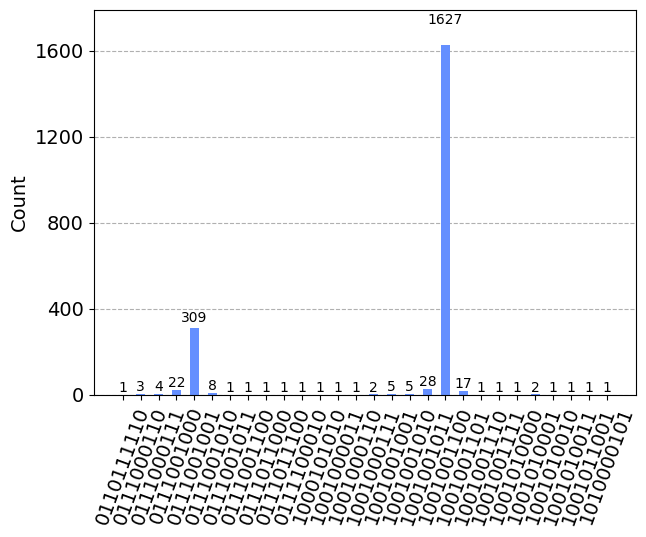

In [23]:
aer_sim = Aer.get_backend('aer_simulator')
shots = 2048
t_qpe = transpile(qpe, aer_sim)
qobj = assemble(t_qpe, shots=shots)
results = aer_sim.run(qobj).result()
answer = results.get_counts()
answer_to_plot = answer.copy()
answer = sorted(answer.items(), key=lambda x:x[1])
new_ans = []
for pair in answer:
    new_ans.append((int(pair[0],2), pair[1]))
answer = new_ans
# print(answer)
plot_histogram(answer_to_plot)
# print(answer)

In [24]:
print(answer)

[(592, 1), (472, 1), (460, 1), (582, 1), (645, 1), (482, 1), (594, 1), (590, 1), (554, 1), (595, 1), (446, 1), (476, 1), (459, 1), (601, 1), (579, 1), (591, 1), (593, 2), (583, 2), (454, 3), (455, 4), (585, 5), (586, 5), (458, 8), (589, 17), (456, 22), (587, 28), (457, 309), (588, 1627)]


In [25]:
import scipy.linalg as la
print(la.expm(1j*2*np.pi*answer[-1][0]/(2**n_of_qubs)))

[[-0.8932243-0.44961133j]]


In [26]:
# print(np.dot(U, vecs_u[1]),  vecs_u[1]*eigs_u[1])

In [27]:
eigs_u

array([-0.94316252+0.33233185j, -0.89355351-0.44895671j])

In [1]:
# qpe.draw()